# Project initialization
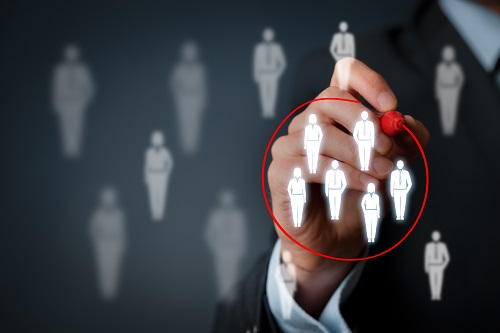
## Background

As a HR manager, you want to understand your employees so that appropriate 
direction can be given to the management to satisfy and retain the employees.

The main goal is to Cluster the different types of Employees based on attributes like their age, job scope,salary etc and answer the following questions. 

* What are the characteristics of each employee cluster
  * Due to these characteristics, what are the main needs of each cluster

*   Which group of employee is the most vulnerable that the management should do 
something to retain them.

*   List item

## Keywords
- Unsupervised Learning
- K-Means Clustering
- Silhouette Analysis
- Hierarchical Clustering
- Spectral Clustering
- Clusters Interpretation

## Import libraries

In [11]:
!pip uninstall sklearn -y
!pip install Cython
!pip install -U scikit-learn
!pip install phik

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
from typing import Sequence, Tuple
from itertools import combinations, chain
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,DBSCAN, OPTICS
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings # Statsmodels likes to throw out warnings. Some of them are important, some are not

## EDA
import phik
from phik import resources, report


## Import Dataset

In [13]:
df_raw = pd.read_csv('../Data/Company_Employee.csv')
df_raw

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


### <h2>Metadata</h2>

| Attribute | Description | Type |
|---|---|---|
| Age | Employee age | Discrete |
| Gender | Employee gender | Categorical-Nominal |
| BusinessTravel:  | Customer's age | Numerical-Continuous |
| Job Function: | Customer's annual income denominated in thousands | Numerical-Continuous |
| Distance Between Company and Home (KM): | spending score between 1 to 100 | Numerical-Continuous |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |

<link href='styles.css' rel='stylesheet'>
<!--bootstrap-->
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-EVSTQN3/azprG1Anm3QDgpJLIm9Nao0Yz1ztcQTwFspd3yD65VohhpuuCOmLASjC" crossorigin="anonymous">

## Feature Renaming 

In [14]:
# Remove Explanation in features
df_raw.rename(columns = {
    "Distance Between Company and Home (KM)" : "Distance",
    "Education (1 is lowest, 5 is highest)" : "Education",
    "Job Satisfaction (1 is lowest, 4 is highest)" : "Job_Satisfaction",
    "Salary ($)" : "Salary",
    "Performance Rating (1 is lowest, 4 is highest)" : "Performance_Rating",
    "Work Life Balance (1 is worst, 4 is best)" : "Work_Life_Balance",
    "Length of Service (Years)" : "Service_Years"
}, inplace = True)

In [15]:
df_raw.Gender = df_raw.Gender.astype('category') # Turns Gender to category dtype

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1470 non-null   int64   
 1   Gender              1470 non-null   category
 2   BusinessTravel      1470 non-null   object  
 3   Job Function        1470 non-null   object  
 4   Distance            1470 non-null   int64   
 5   Education           1470 non-null   int64   
 6   Job_Satisfaction    1470 non-null   int64   
 7   MaritalStatus       1470 non-null   object  
 8   Salary              1470 non-null   int64   
 9   Performance_Rating  1470 non-null   int64   
 10  Work_Life_Balance   1470 non-null   int64   
 11  Service_Years       1470 non-null   int64   
 12  Resign Status       1470 non-null   object  
dtypes: category(1), int64(8), object(4)
memory usage: 139.5+ KB


# EDA

In [16]:
df_eda = df_raw.copy()

## Pairplot

* Is there an identifiable cluster by glancing through the datapoints?
* Is there a significant difference of the Spending Behaviour across different gender?
* Is there a need to remove/create certain features to reduce ambiguity for the clustering?

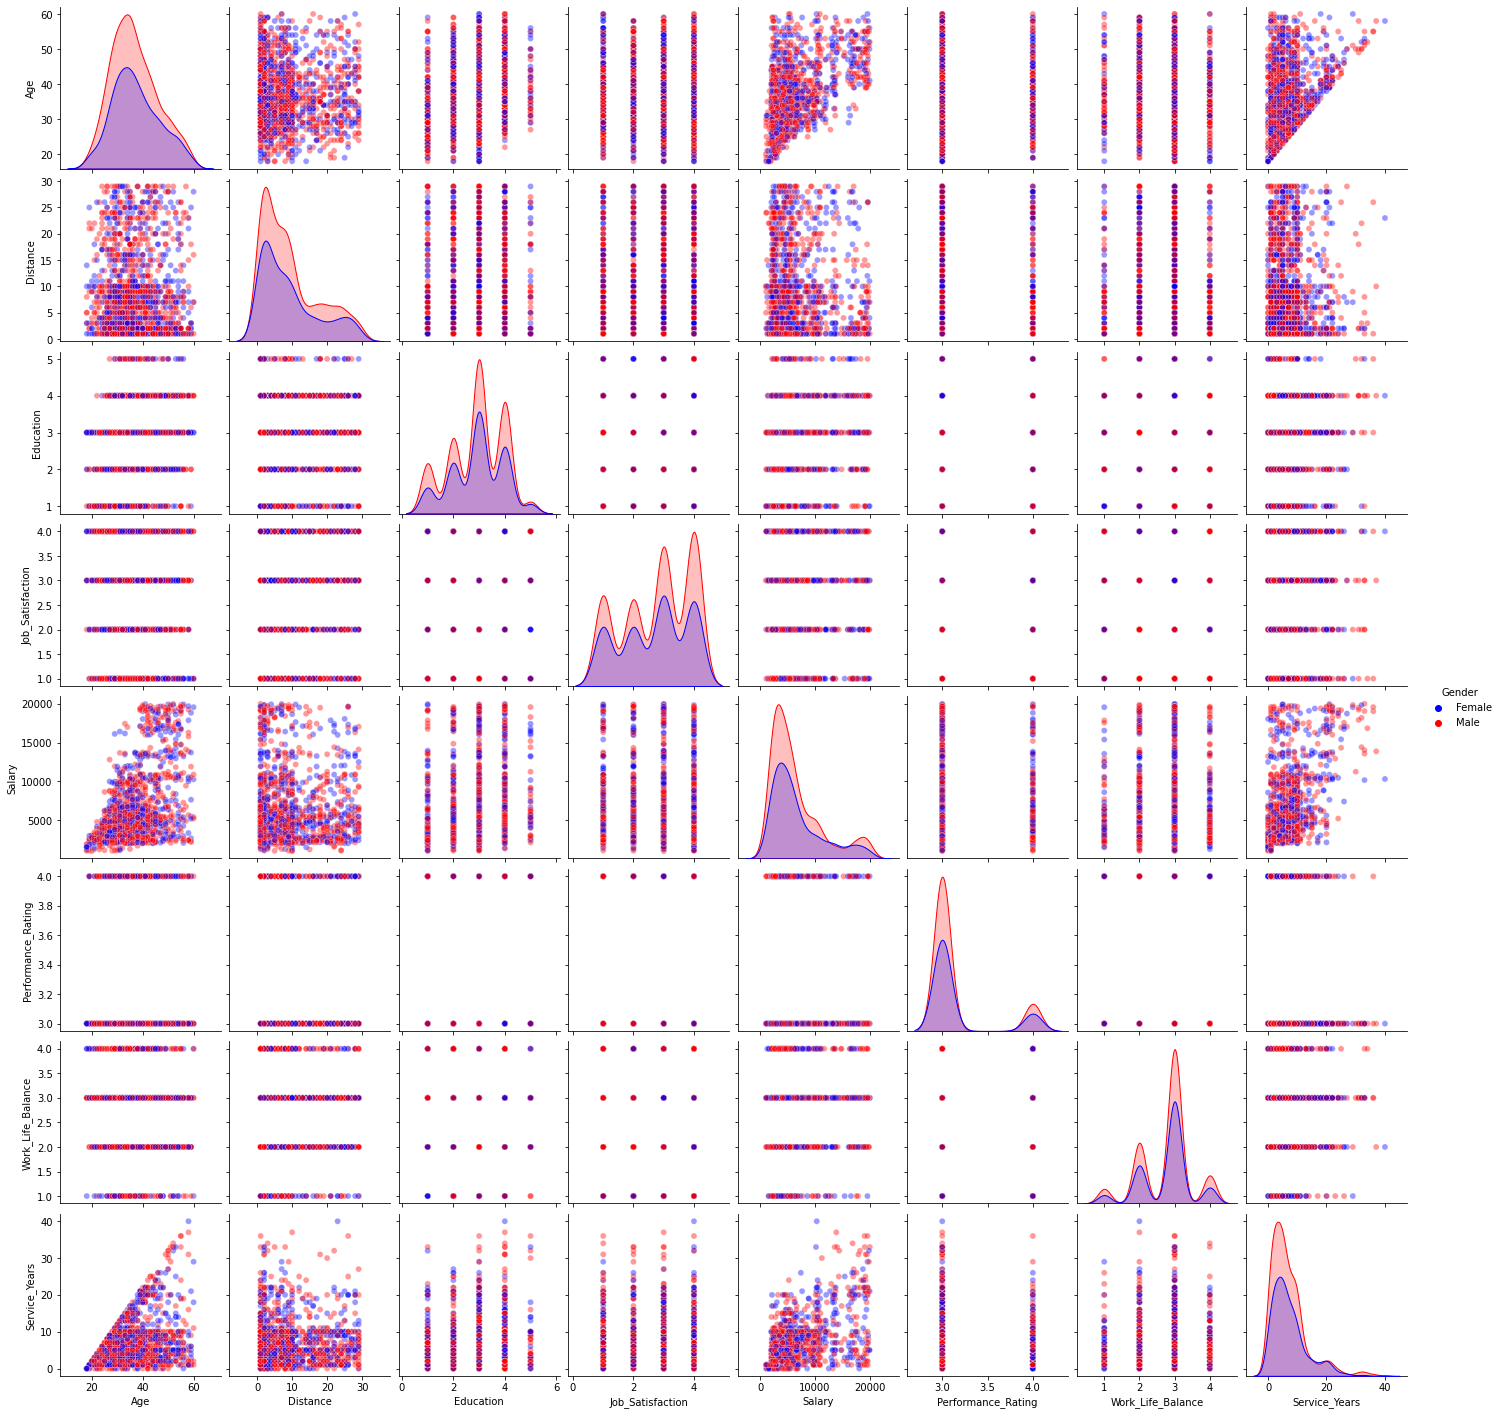

In [17]:
sns.pairplot(df_eda, hue = 'Gender', palette=['b', 'r'], plot_kws=dict(alpha=0.4))
plt.show()

In [18]:
df_eda.phik_matrix()

interval columns not set, guessing: ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary', 'Performance_Rating', 'Work_Life_Balance', 'Service_Years']


,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job_Satisfaction,MaritalStatus,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Resign Status
Age,1.000000,0.000000,0.069800,0.000000,0.000000,0.352040,0.000000,0.231465,0.542212,0.000000,0.055496,0.560431,0.278172
Gender,0.000000,1.000000,0.022402,0.015435,0.034159,0.000000,0.000000,0.019555,0.059711,0.000000,0.000000,0.051930,0.014016
BusinessTravel,0.069800,0.022402,1.000000,0.000000,0.042961,0.000000,0.000000,0.115345,0.043209,0.000000,0.000000,0.000000,0.074137
Job Function,0.000000,0.015435,0.000000,1.000000,0.000000,0.000000,0.031204,0.100830,0.299377,0.000000,0.050038,0.056353,0.046641
Distance,0.000000,0.034159,0.042961,0.000000,1.000000,0.000000,0.000000,0.000000,0.108462,0.072127,0.000000,0.000000,0.089419
Education,0.352040,0.000000,0.000000,0.000000,0.000000,1.000000,0.018766,0.000000,0.221059,0.000000,0.000000,0.174985,0.000000
Job_Satisfaction,0.000000,0.000000,0.000000,0.031204,0.000000,0.018766,1.000000,0.000000,0.000000,0.039723,0.000000,0.000000,0.150024
MaritalStatus,0.231465,0.019555,0.115345,0.100830,0.000000,0.000000,0.000000,1.000000,0.101592,0.000000,0.000000,0.095044,0.104779
Salary,0.542212,0.059711,0.043209,0.299377,0.108462,0.221059,0.000000,0.101592,1.000000,0.000000,0.000000,0.610329,0.280586
Performance_Rating,0.000000,0.000000,0.000000,0.000000,0.072127,0.000000,0.039723,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


interval columns not set, guessing: ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary', 'Performance_Rating', 'Work_Life_Balance', 'Service_Years']


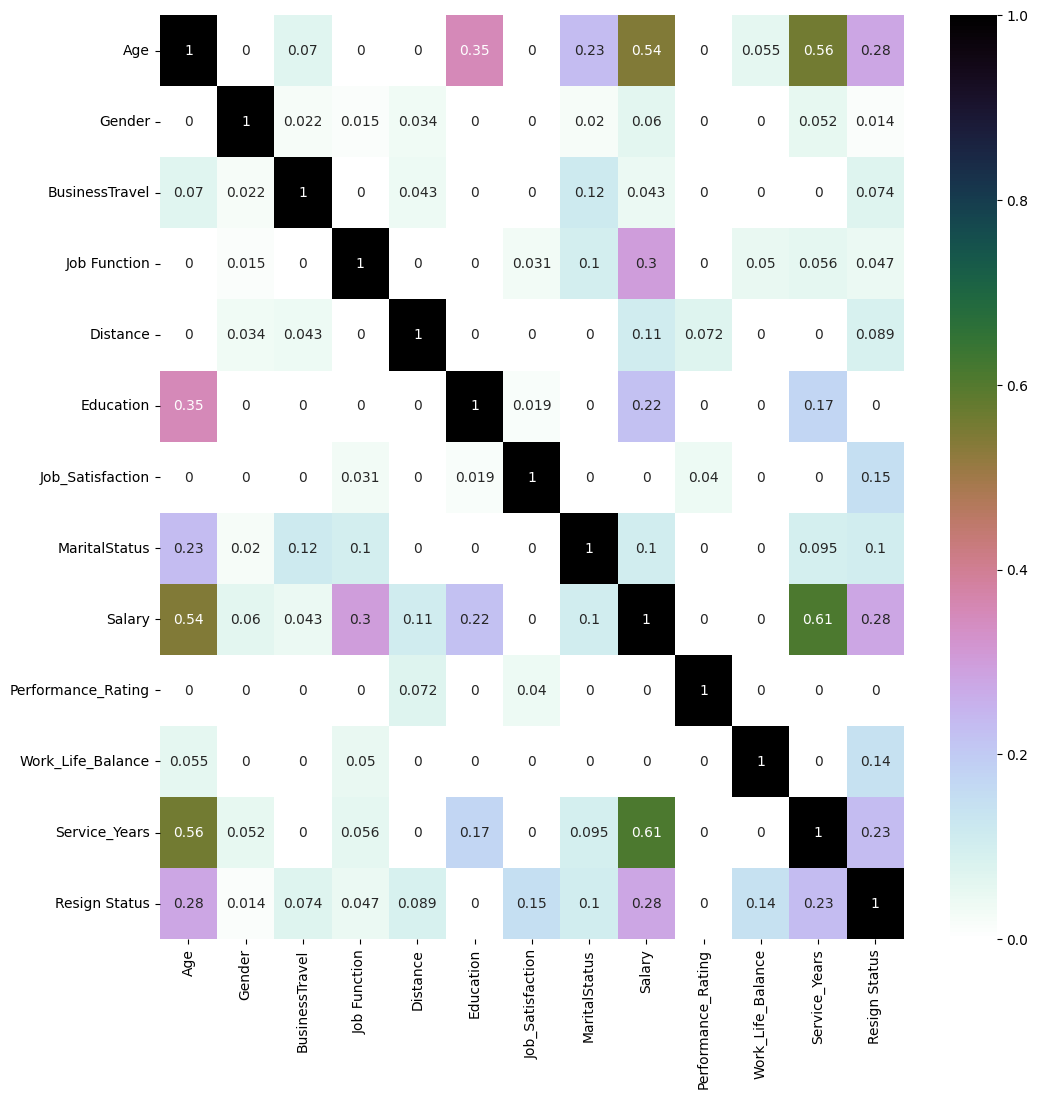

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df_eda.phik_matrix(),
    cmap="cubehelix_r",
    annot = True)
plt.show()

## Since we are only interested figuring out which clusters of emplyoees 
Focusing of Resign Status, the least correlated features to Resign Status are `Gender`,`Job Function`,`Disatance`, `Education`

## Univaritive Analysis across Resign Status 

In [20]:
df_eda.head()

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job_Satisfaction,MaritalStatus,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No


In [21]:
df_eda.columns

Index(['Age', 'Gender', 'BusinessTravel', 'Job Function', 'Distance',
       'Education', 'Job_Satisfaction', 'MaritalStatus', 'Salary',
       'Performance_Rating', 'Work_Life_Balance', 'Service_Years',
       'Resign Status'],
      dtype='object')

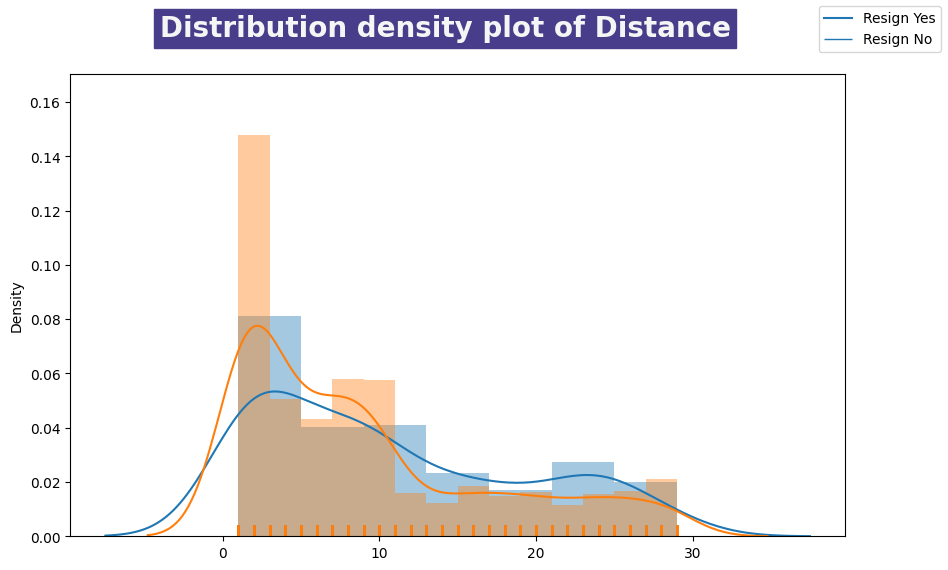

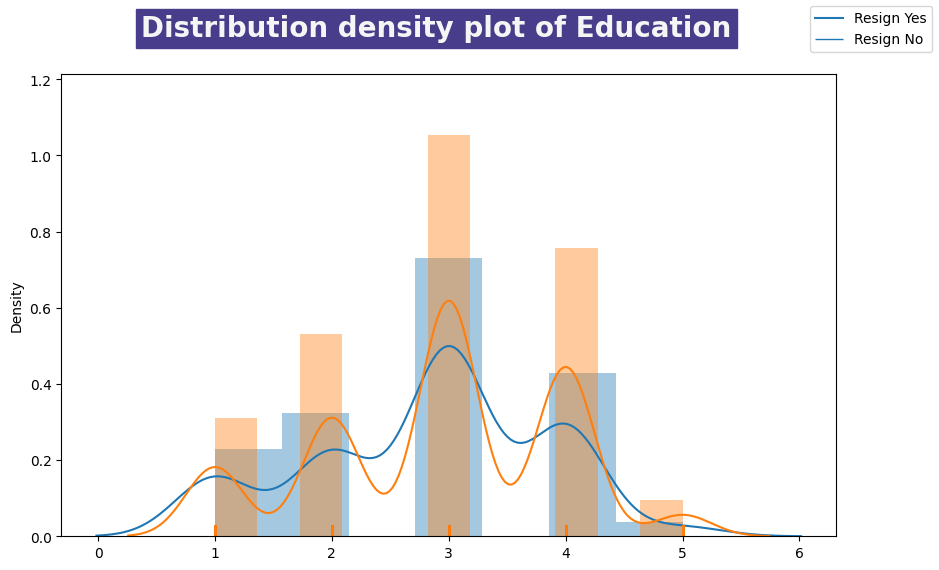

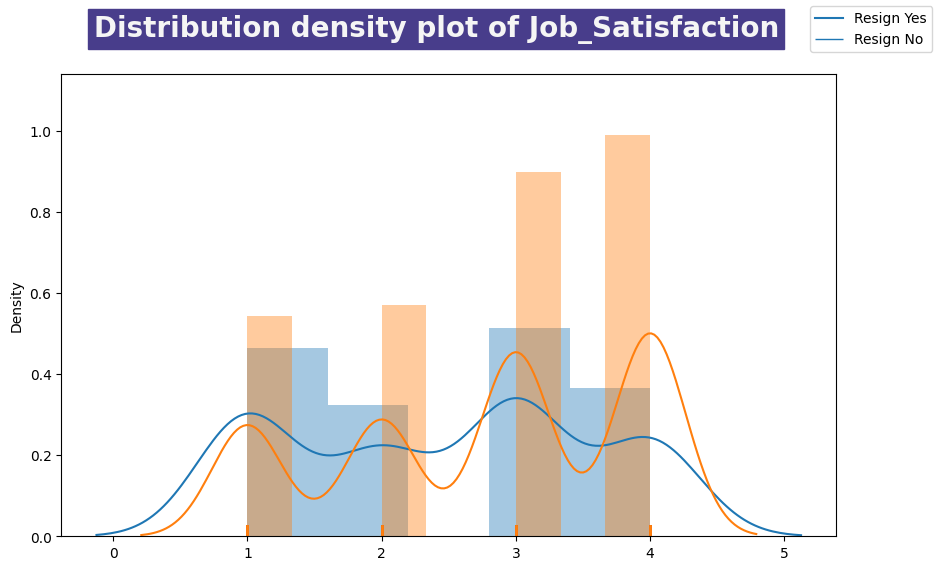

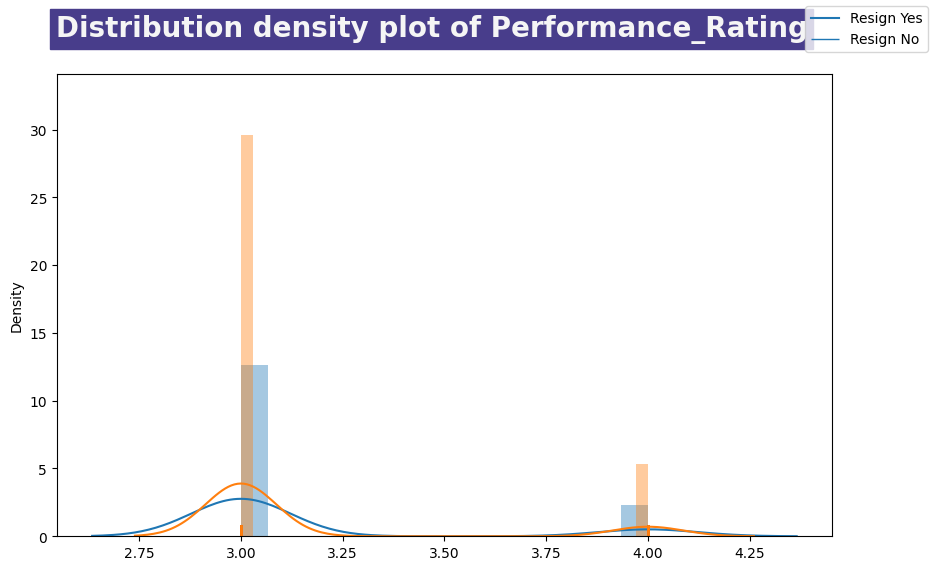

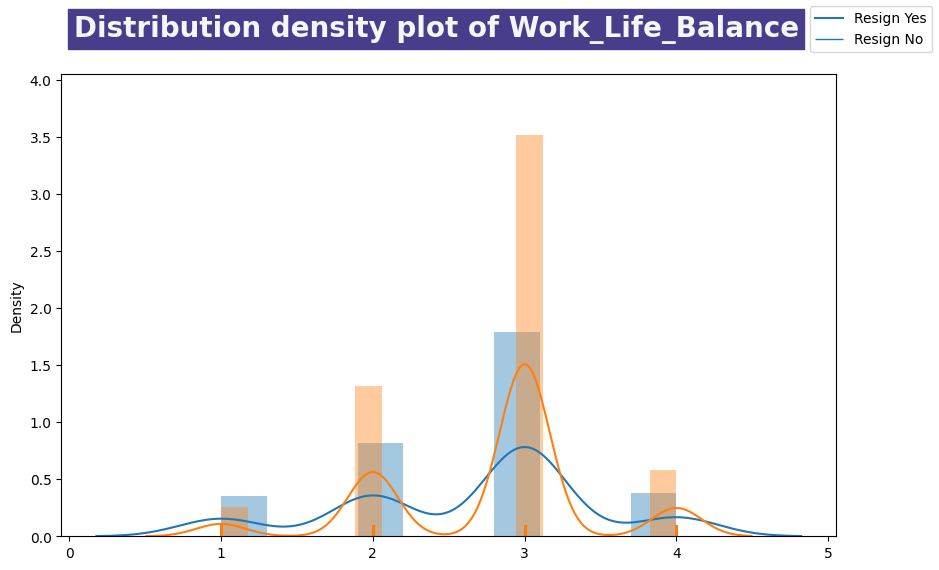

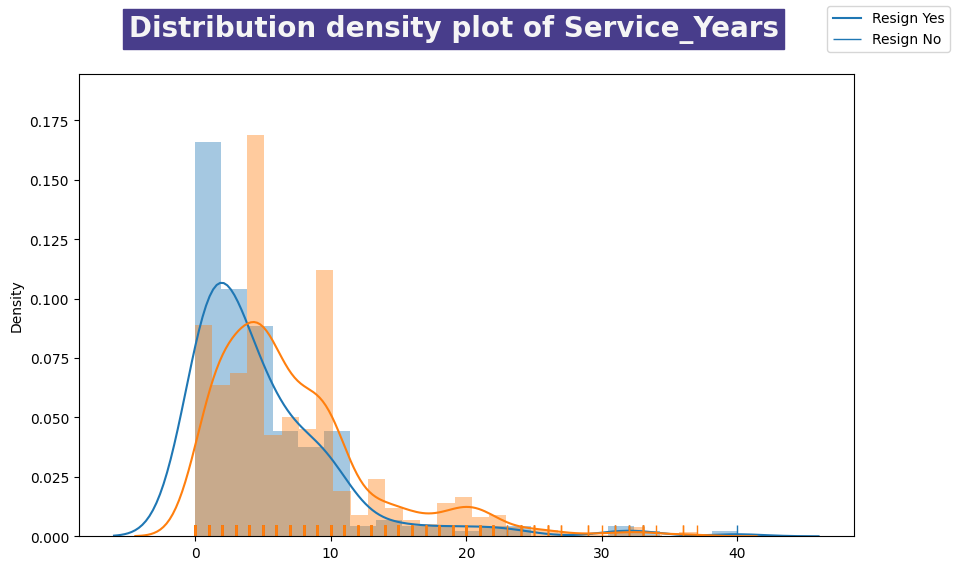

In [22]:
df_eda_resign = df_eda[df_eda['Resign Status']=='Yes']
df_eda_normal = df_eda[df_eda['Resign Status']=='No']

# df_eda_melt = df_eda.melt(['Machine Status'],value_vars=['Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)','Torque (Nm)'], var_name='cols',  value_name='vals')

features = ['Distance','Education', 'Job_Satisfaction','Performance_Rating', 'Work_Life_Balance', 'Service_Years']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in features:
      fig = plt.figure(figsize=(10,6))
      sns.distplot(df_eda_resign[[i]], hist=True, rug=True)
      sns.distplot(df_eda_normal[[i]], hist=True, rug=True)

      fig.suptitle(f'Distribution density plot of {i}',color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')

      fig.legend(labels=['Resign Yes','Resign No'])
      plt.show()

# Data Preprocessing

In [23]:
# Extract all numeric values
numeric = df_raw.select_dtypes(include=np.number).columns.tolist()
numeric

['Age',
 'Distance',
 'Education',
 'Job_Satisfaction',
 'Salary',
 'Performance_Rating',
 'Work_Life_Balance',
 'Service_Years']

## Standard Scaling

In [24]:
scaler = StandardScaler()
df_scaled = df_raw.copy()
df_scaled[numeric] = scaler.fit_transform(df_scaled[numeric])
df_scaled.head()

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job_Satisfaction,MaritalStatus,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Resign Status
0,0.446350,Female,Travel_Rarely,Sales,-1.010909,-0.891688,1.153254,Single,-0.108350,-0.426230,-2.493820,-0.164613,Yes
1,1.322365,Male,Travel_Frequently,Research & Development,-0.147150,-1.868426,-0.660853,Married,-0.291719,2.346151,0.338096,0.488508,No
2,0.008343,Male,Travel_Rarely,Research & Development,-0.887515,-0.891688,0.246200,Single,-0.937654,-0.426230,0.338096,-1.144294,Yes
3,-0.429664,Female,Travel_Frequently,Research & Development,-0.764121,1.061787,0.246200,Married,-0.763634,-0.426230,0.338096,0.161947,No
4,-1.086676,Male,Travel_Rarely,Research & Development,-0.887515,-1.868426,-0.660853,Married,-0.644858,-0.426230,0.338096,-0.817734,No


## One-Hot-Encoding

In [25]:
df_onehot = pd.get_dummies(df_scaled, drop_first=True)
df_onehot.head()

,Age,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.446350,-1.010909,-0.891688,1.153254,-0.108350,-0.426230,-2.493820,-0.164613,0,0,1,0,1,0,1,1
1,1.322365,-0.147150,-1.868426,-0.660853,-0.291719,2.346151,0.338096,0.488508,1,1,0,1,0,1,0,0
2,0.008343,-0.887515,-0.891688,0.246200,-0.937654,-0.426230,0.338096,-1.144294,1,0,1,1,0,0,1,1
3,-0.429664,-0.764121,1.061787,0.246200,-0.763634,-0.426230,0.338096,0.161947,0,1,0,1,0,1,0,0
4,-1.086676,-0.887515,-1.868426,-0.660853,-0.644858,-0.426230,0.338096,-0.817734,1,0,1,1,0,1,0,0


In [26]:
df_onehot.columns

Index(['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary',
       'Performance_Rating', 'Work_Life_Balance', 'Service_Years',
       'Gender_Male', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Job Function_Research & Development',
       'Job Function_Sales', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'Resign Status_Yes'],
      dtype='object')

## Feature extractions ( TESTING JUST REMOVING SHIT)

In [27]:
df_onehot = df_onehot.drop(columns=['Gender_Male','Job Function_Research & Development','Job Function_Sales', "Education",'Performance_Rating'])
df_onehot.head()

,Age,Distance,Job_Satisfaction,Salary,Work_Life_Balance,Service_Years,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.446350,-1.010909,1.153254,-0.108350,-2.493820,-0.164613,0,1,0,1,1
1,1.322365,-0.147150,-0.660853,-0.291719,0.338096,0.488508,1,0,1,0,0
2,0.008343,-0.887515,0.246200,-0.937654,0.338096,-1.144294,0,1,0,1,1
3,-0.429664,-0.764121,0.246200,-0.763634,0.338096,0.161947,1,0,1,0,0
4,-1.086676,-0.887515,-0.660853,-0.644858,0.338096,-0.817734,0,1,1,0,0


# Clustering

In [28]:
def calculate_k_mean(n_cluster: int, X: Sequence)-> Tuple[float, Sequence, Sequence, sklearn.cluster._kmeans.KMeans]:
    '''
    General Function to returns commonly used metrics for K-Means Clustering and the fitted instance
    '''
    kmean = KMeans(n_clusters = n_cluster, random_state=24)
    cluster_labels = kmean.fit_predict(X)
    print(cluster_labels)
    return kmean.inertia_, cluster_labels, kmean.cluster_centers_, kmean

In [29]:
log = [] 
silhoettes = True
k_range = range(2,9) # Range of k values

for k in k_range:
    inertia, cluster_labels, _, _ = calculate_k_mean(k, df_onehot) # Fitting the model
    if silhoettes: # Generate Silhoettes Score
        silhoettes_avg = silhouette_score(df_onehot, cluster_labels)
        log.append([k, inertia, silhoettes_avg])
        continue
    log.append([k, inertia])

[0 0 0 ... 0 0 0]
[2 0 2 ... 0 0 2]
[2 3 2 ... 3 3 2]
[2 3 1 ... 3 2 1]
[0 2 5 ... 2 0 5]
[5 4 0 ... 4 3 0]
[4 3 7 ... 1 3 7]


## Elbow Method ( Inertia )

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion.

$$ \text{Inertia} = \sum^m_{i=1}||x^{(i)}-\mu_{c^{(i)}}||^2_2 $$

- $m$ : Number of Datapoints
- $x^{(i)}$ : i-th Datapoints
- $\mu_{c^{(i)}}$ : Cluster Centroids for i-th Datapoints

> Inertia Measure the Sum of Squared Distance of each datapoints to its assigned cluster centroids.

However, I personally do not believe that using our human intuition to "Eyeball" where the elbow is to be optimal. Hence I'll be using Kneed package to compute the optimal elbow directly


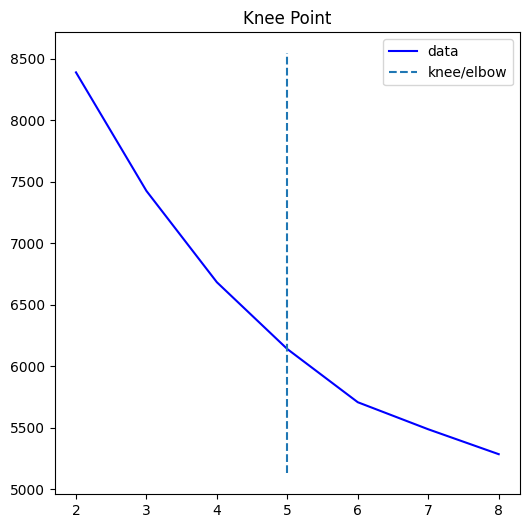

In [32]:
from kneed import KneeLocator
plot_df = pd.DataFrame(
    log, columns = [
        'k', 'Inertias (Sum of squared distances to Nearest Cluster Centroids)', 'Silhouette Coefficient'
        ]
    )
kl = KneeLocator(plot_df['k'], plot_df['Inertias (Sum of squared distances to Nearest Cluster Centroids)'], curve="convex",direction="decreasing")
kl.plot_knee()

In [ ]:
def silhouette_analysis_with_pca(n_clusters : int,  X: Sequence):
    '''
    Perform Silhoette Analysis and Visualising the clusters generated using PCA

    Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    '''
    
    # Perform K-Mean Clustering
    _, cluster_labels, cluster_centroids, kmean = calculate_k_mean(n_clusters, X)

    # Compute Individual Silhoette Score
    silhoettes_avg = silhouette_score(X, cluster_labels)

    # Compute Average Silhoette Score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ################################### Silhouette Plot #############################################
  
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_raw) + (n_clusters + 1) * 10])
    y_lower = 10

    # Assign colours for different cluster
    for i in range(n_clusters):
         # Aggregate the silhouette scores for samples belonging to
         # cluster i, and sort them
         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
         ith_cluster_silhouette_values.sort()
         size_cluster_i = ith_cluster_silhouette_values.shape[0]
         y_upper = y_lower + size_cluster_i
         color = cm.nipy_spectral(float(i) / n_clusters)
         ax1.fill_betweenx(np.arange(y_lower, y_upper),
                           0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)
         # Label the silhouette plots with their cluster numbers at the middle
         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
         # Compute the new y_lower for next plot
         y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The Silhouette Plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhoettes_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ################################### PCA Plot #############################################
 
    # Compute PCA with only First 2 Number of Component
    pca2 = PCA(n_components=2)
    sample_pca2 = pca2.fit_transform(X)

    # Plotting the PCA graph
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sample_pca2[:,0], sample_pca2[:,1], marker='.', s=75, lw=0, alpha=1,
            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster_centroids.dot(pca2.components_.T) # Calculate New Cluster Positions after PCA

    # Labelling each cluster centroids
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                 c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the PCA with total variance explained of {:.2f}%.".format(pca2.explained_variance_ratio_.sum()*100))
    ax2.set_xlabel("Feature space for the 1st principle component")
    ax2.set_ylabel("Feature space for the 2nd principle component")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

for i, k in enumerate(range(3,9)): # Analyse k = (4,5,6)
    silhouette_analysis_with_pca(n_clusters = k, X = df_onehot)
    plt.show()

## PCA analysis

In [ ]:
df_onehot.columns

In [ ]:
df_onehot

In [ ]:
from sklearn.decomposition import PCA

columns_PCA = ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary',
       'Performance_Rating', 'Work_Life_Balance', 'Service_Years',
       'Gender_Male', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Job Function_Research & Development',
       'Job Function_Sales', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'Resign Status_Yes']

pca = PCA(n_components=16).fit(df_onehot[columns_PCA])

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = columns_PCA) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios,cum_variance_ratios, components], axis = 1)

In [ ]:
pca_df = pca_results(df_onehot,pca)
pca_df

In [ ]:
#Scree plot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

# K means Clustering 

K means Clustering is by far the most popular algorithm for clustering data by assign clusters based on the distance towards the cluster centroids iterative. This is due to easy to implement and understand

I will be choosing to set parameters such that the initialization method to be 'k-means++' which will initialize starting centroids very far away from data points which reduces the initialization sensitivity that would affect the final formed clusters. 

In [ ]:
display(df_onehot)

In [ ]:
kmean =  KMeans(init='k-means++', max_iter=500, algorithm = "elkan", random_state=0).fit(df_onehot)


## Determine the best possible value of k.

There isn't a definitive set of rules to automatically extract the optimal number of K In most cases the better way of choosing the number of clusters is to ask 

> "For what purpose are we using K-means"


From there think about what is the optimal number of clusters to serve our purpose. For our problem statement, our ultimate goal is to find out "*Which group of employee is the most vulnerable for resignation*". From my human intution, I can currently only logically determin 5-10 different types of Employees that would share similar needs for each cluster. However, this 5-10 range is completely ambigious from my own intuition. 

Therefore, we would require a more systemtic method of choosing optimal number of K

### Computational Methods for choosing K

There are a few visual methods that can aid us in choosing No.K which includes:



*   Elbow Method
*   List item



There isn't a definitive set of rules to automatically extract the optimal number of K

### Elbow Method

## Silhouette Clustering for validating clustering models

Silhouette  clustering is a method used to quantify/validate how well a clustering 

There is two components that are calculated in Silhouette clustering

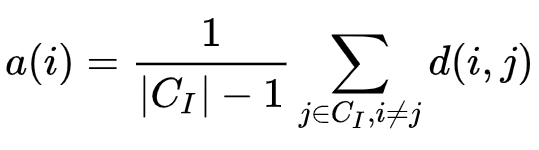

Where 
data point i in the cluster {C_{I}}C_{I}

- $a^{(i)}$ : Average Distance to other datapoints of the Assigned Cluster Centroids

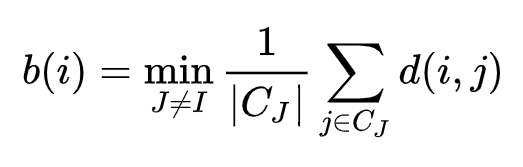

- $b^{(i)}$ : Average Distance to Nearest Cluster Centroids

If cluster model is good, **b(i) > a(i)** . 

The output from Silhouette cluster ranges from -1 to 1, the closer the silhouette score is to 1, the better the model

In [ ]:
def get_cluster_centroids(data):
    cluster_centers = data.groupby('Cluster').mean()
    cluster_centers['Cluster Size (% of Total)'] = pd.Series(data['Cluster']).value_counts() / len(data['Cluster']) * 100
    return cluster_centers

## Testing DBSCAN

## TSNE 

We will be utilizing t-Distributed Stochastic Neighbor Embedding (t-SNE) to help us visualize our high dimensinal dataset in two diemnsions to be able to plot at visualize clusters more effectively.

There are two parameterds to TSNE



1.   perplexity
2.   learning_rate

For Perplexity, the [Sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) documentation mentioned selecting a perplexity value between 5 and 50. 

We iterate through potential values 



In [ ]:
display(df_onehot)

,Age,Distance,Job_Satisfaction,Salary,Work_Life_Balance,Service_Years,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.446350,-1.010909,1.153254,-0.108350,-2.493820,-0.164613,0,1,0,1,1
1,1.322365,-0.147150,-0.660853,-0.291719,0.338096,0.488508,1,0,1,0,0
2,0.008343,-0.887515,0.246200,-0.937654,0.338096,-1.144294,0,1,0,1,1
3,-0.429664,-0.764121,0.246200,-0.763634,0.338096,0.161947,1,0,1,0,0
4,-1.086676,-0.887515,-0.660853,-0.644858,0.338096,-0.817734,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.703764,1.153254,-0.835451,0.338096,-0.327893,1,0,1,0,0
1466,0.227347,-0.393938,-1.567907,0.741140,0.338096,-0.001333,0,1,1,0,0
1467,-1.086676,-0.640727,-0.660853,-0.076690,0.338096,-0.164613,0,1,1,0,0
1468,1.322365,-0.887515,-0.660853,-0.236474,-1.077862,0.325228,1,0,1,0,0


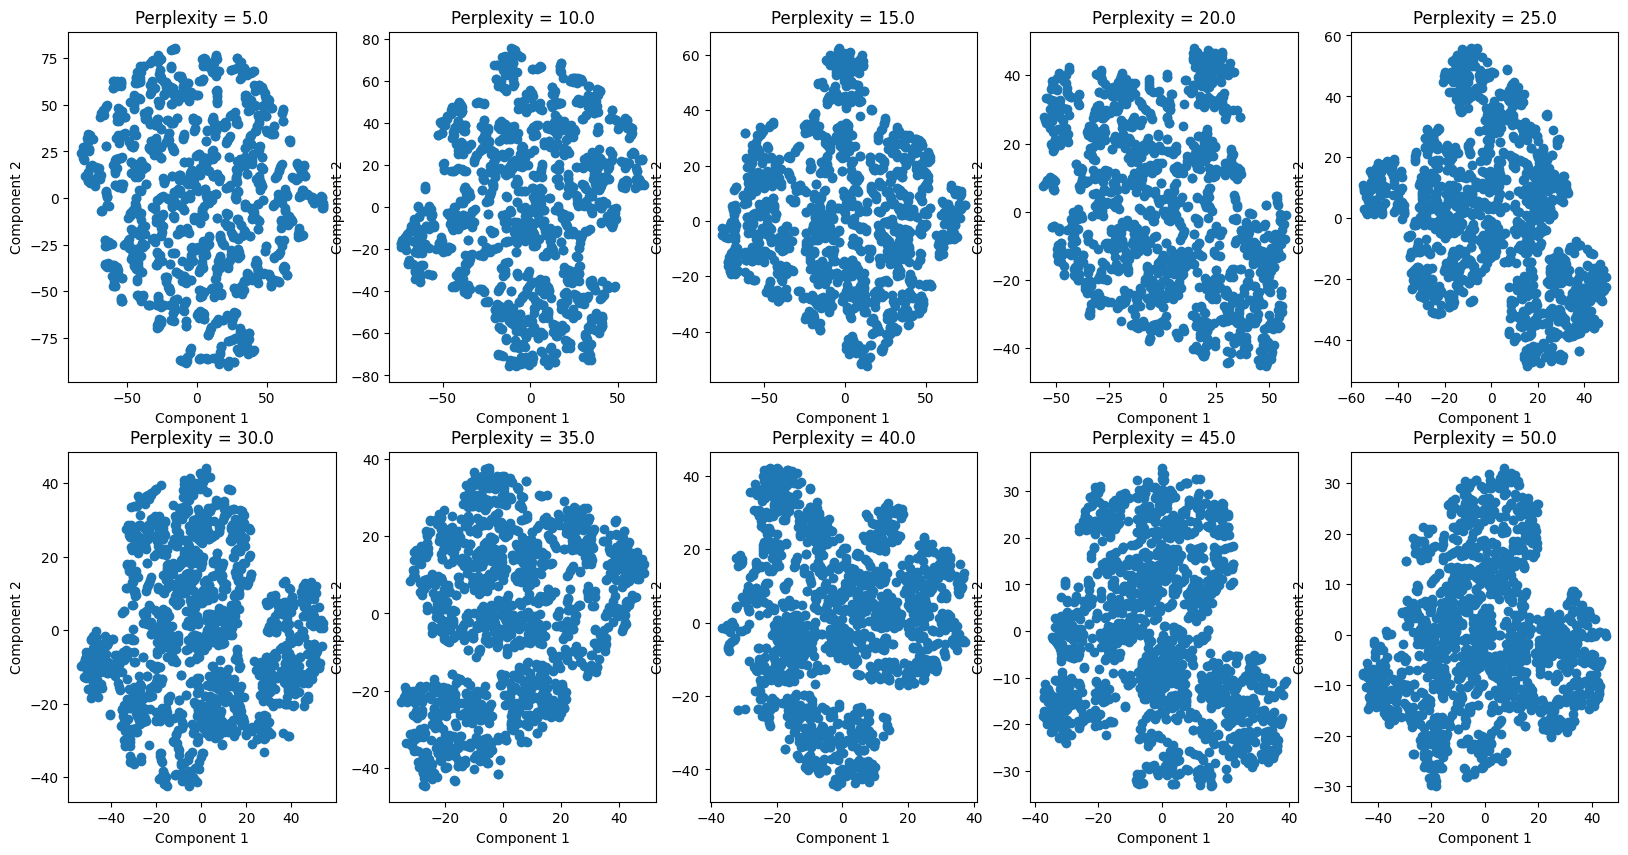

In [36]:
tsne = TSNE()

perplexity= np.linspace(start=5,stop=50,num=10)


fig, axes = plt.subplots(2,5, figsize=(20,10))
for idx,perplexity in enumerate(perplexity):
  tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplexity)
  X_embedded = tsne.fit_transform(df_onehot)
  axes[idx//5,idx%5].scatter(X_embedded[:,0], X_embedded[:,1])
  axes[idx//5,idx%5].set_title('Perplexity = {}'.format(perplexity))
  axes[idx//5,idx%5].set_xlabel('Component 1')
  axes[idx//5,idx%5].set_ylabel('Component 2')

Conclusion:

We will use TSNE with epsilion = 30 as it its most interpretable

In [ ]:
epsilon = np.arrange(start=0.1,stop=1,num=10)
min_samples = np.arange(start=1,stop=10,num=10)


dbscan_df = df_onehot.copy()
cluster_labels = DBSCAN(eps=0.4, min_samples=20).fit_predict(dbscan_df)
dbscan_df['Cluster'] = cluster_labels
cluster_centers = get_cluster_centroids(dbscan_df)
sns.pairplot(dbscan_df, hue='Cluster', corner=True, palette="tab10")